<a href="https://colab.research.google.com/github/vkvinay0627/Global-Terrorism-Database-Analysis/blob/main/Global_Terrorism_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Global Terrorism Database (GTD) is an open-source database including information on terrorist attacks around the world from 1970 through 2017. The GTD includes systematic data on domestic as well as international terrorist incidents that have occurred during this time period and now includes more than 180,000 attacks. The database is maintained by researchers at the National Consortium for the Study of Terrorism and Responses to Terrorism (START), headquartered at the University of Maryland.</b>

# <b> Explore and analyze the data to discover key findings pertaining to terrorist activities. </b>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# <b>1. Year-wise trend on world</b>

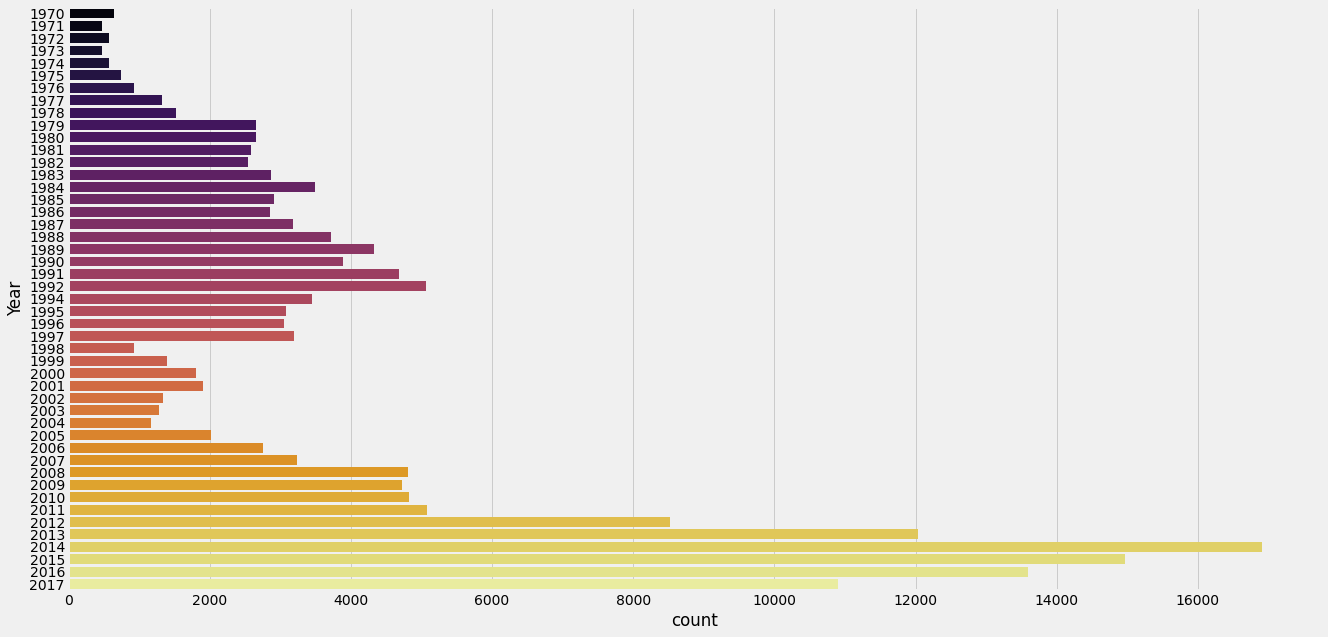

In [19]:
# 1.1 In which year, attacks happened most number of times

plt.rcParams['figure.figsize'] = 20,10
sns.countplot(y=df['Year'], palette='inferno')
plt.show()

# Result = minimum attacks between 1997 and 2004 && maximum attacks in year 2014

Result = minimum attacks between 1997 and 2004 and maximum attacks in year 2014

   Year  no_of_kills
0  2014      44490.0
1  2015      38853.0
2  2016      34871.0
3  2017      26445.0
4  2013      22273.0


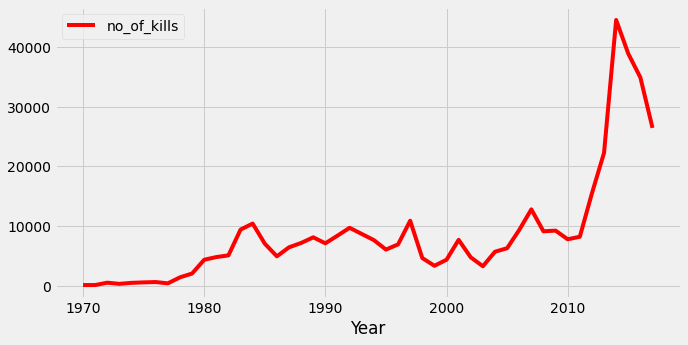

In [20]:
# 1.2 In which year, Highest number of kills are there.
  
Kills_year = df[['no_of_kills','Year']]
Kills_year2 = Kills_year.groupby(['Year']).sum().sort_values('no_of_kills',ascending=False).reset_index().head(5)
print(Kills_year2)
plt.rcParams['figure.figsize'] = 10,5
Kills_by_year = df[["Year","no_of_kills"]].groupby("Year").aggregate(np.sum)
Kills_by_year.plot(color = 'r');

#Results = maximum kills in 2014 and downward trend since then

Results = maximum kills in 2014 and downward trend since then

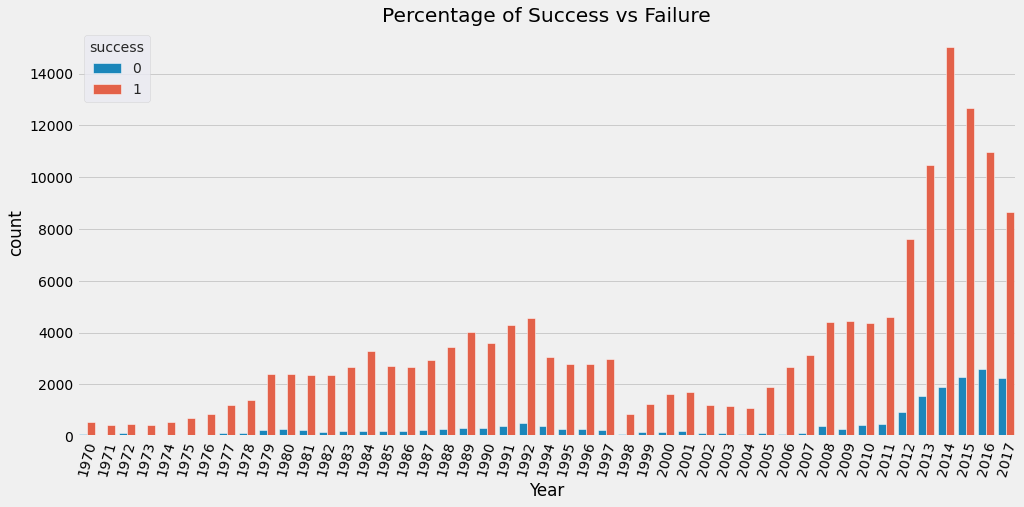

In [21]:
plt.figure(figsize=(15,7))   
plt.title("Percentage of Success vs Failure") # printing the title
plt.xticks(rotation=75)
sns.set_style('darkgrid')  # Making background in a stylish format
sns.countplot(x ='Year', hue = "success", data = df)  #using countplot with year and success
plt.show() # showing the plot...

In [22]:
layout = widgets.Layout(width='auto', height='40px')
start_dater = widgets.DatePicker(description='Pick a Start Date',disabled=False )
end_dater = widgets.DatePicker(description='Pick an End Date',disabled=False )

# display(start_dater)
# display(end_dater)

# <b>2. Region Wise Analysis</b>



In [23]:

def plotter():
    df1 = df[(df['date']>pd.to_datetime(start_dater.value))&(df['date']<pd.to_datetime(end_dater.value))] 
    plt.figure(figsize=(25,7))   #  Incresing figure size...
    sns.set_style('ticks')
    plt.xticks(rotation=45)
    plt.title("Region-Wise Attack Count")  # Giving title to the graph... 
    _=sns.countplot(x ='Region', data = df1)  # Using Count Plot..  
display(start_dater)
display(end_dater)
interact_manual(plotter)

DatePicker(value=None, description='Pick a Start Date')

DatePicker(value=None, description='Pick an End Date')

interactive(children=(Button(description='Run Interact', style=ButtonStyle()), Output()), _dom_classes=('widge…

<function __main__.plotter>

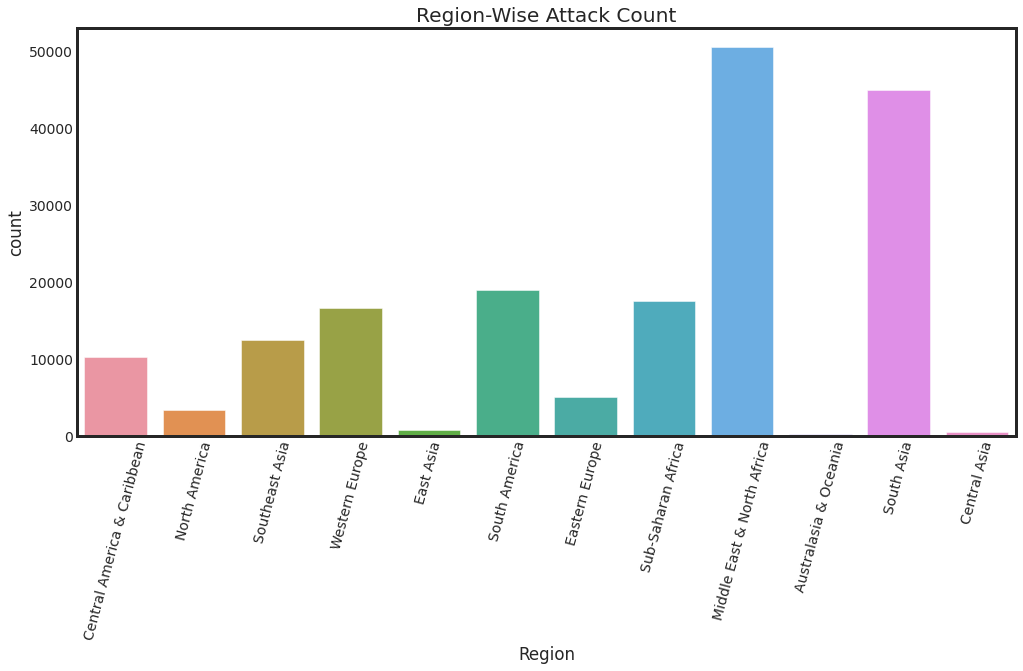

In [24]:
#2.1 Regions with most attacks (1970-2017) and Year-wise
plt.figure(figsize=(15,7))   #  Incresing figure size...
sns.set_style('ticks')
plt.xticks(rotation=75)
plt.title("Region-Wise Attack Count")  # Giving title to the graph...
_=sns.countplot(x ='Region', data = df)  # Using Count Plot..

# Results = Middle East and North Africa region is the most affected in terms of attack counts


*  Middle East and North Africa region has encountered maximum no of attacks



In [25]:
# 2.1.1 Year-wise and Region-wise distribution of attack counts
plt.figure(figsize=(25,7))
@interact

def attack_year(year=list(df['Year'].unique())):
  plt.title("Region-Wise Attack Count")
  a = df[df['Year']==year]
  return sns.countplot(y=a['Region'],palette='viridis')

# Results =  Year-wise and Region-wise distribution of attack counts

<Figure size 1800x504 with 0 Axes>

interactive(children=(Dropdown(description='year', options=(1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 19…

In [26]:
# 2.2 Regions with highest no of kills (1970-2017)
kills_by_region = df[['no_of_kills','Region']]
kills_by_region = kills_by_region.groupby(['Region']).sum().sort_values('no_of_kills',ascending=False).reset_index().head(5)
print(kills_by_region)

#Results(Region-wise) = Middle East and North Africa region has the maximum no of kills in 2014 totalled at 20080

                        Region  no_of_kills
0   Middle East & North Africa     137642.0
1                   South Asia     101319.0
2           Sub-Saharan Africa      78386.0
3                South America      28849.0
4  Central America & Caribbean      28708.0




*   Middle East and North Africa region has the maximum no of kills in 2014 totalled at 20080



In [27]:
# Let's check which group has taken the maximum no. of live in their respective regions
grp_max_kills=df[['group_name','Region','no_of_kills']]
grp_max_kills=grp_max_kills.groupby(['group_name','Region'],axis=0).sum().sort_values('no_of_kills',ascending=False).drop('Unknown').reset_index().head(5)
grp_max_kills

,group_name,Region,no_of_kills
0,Islamic State of Iraq and the Levant (ISIL),Middle East & North Africa,38654.0
1,Taliban,South Asia,29407.0
2,Boko Haram,Sub-Saharan Africa,20328.0
3,Shining Path (SL),South America,11601.0
4,Liberation Tigers of Tamil Eelam (LTTE),South Asia,10989.0



*   ISIL in Middle East & North Africa region has maximum no. of kills totalled at 38654



# <b>3. Country Wise Analysis</b>

In [28]:
# 3.1 Country with max attack counts
Country_attacked_most =df['Country'].value_counts()
Country_attacked_most = DataFrame(Country_attacked_most)
Country_attacked_most.reset_index(level=0, inplace=True)
Country_attacked_most.columns = ['Country', 'Attack Count']
print(Country_attacked_most.head())


       Country  Attack Count
0         Iraq         24636
1     Pakistan         14368
2  Afghanistan         12731
3        India         11960
4     Colombia          8306





*   Max. no. of attacks on Iraq totalled at 24636




In [29]:
##3.2 let's check which countries are affected more from each region #no of attacks

@interact
def Weapon_type(Region=list(df['Region'].unique())):
  a = df[df['Region']==Region]
  a=pd.DataFrame(a['Country'].value_counts())
  return a.style.background_gradient(cmap='plasma')

interactive(children=(Dropdown(description='Region', options=('Central America & Caribbean', 'North America', …

In [30]:
# 3.3 Name of the city, village, or town in which the incident occurred
print(df['City'].value_counts(dropna=True, normalize=False, ascending=False).index[0] ,
      'and Unnamed Cities consisting of Terrorist Attacks totalled at',
      df['City'].value_counts(dropna=True, normalize=False, ascending=False).max())
print(' ')
print('The most known city that had terror attacks was' ,
      df['City'].value_counts(dropna=True, normalize=False, ascending=False).index[1])
print(' ')

Unknown and Unnamed Cities consisting of Terrorist Attacks totalled at 10209
 
The most known city that had terror attacks was Baghdad
 
